In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('drive/My Drive/Colab Notebooks/Task/Task 7')

In [4]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

**Importing the dataset**

In [39]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Gender']=label_encoder.fit_transform(data['Gender'])

**Splitting the dataset into the Training set and Test set**

In [7]:
X=data.iloc[:,1:4]
y=data['Purchased']
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

**Feature Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

**Fitting SVM to the Training set**

In [9]:
from sklearn.svm import SVC

In [10]:
svc_model=SVC(C=.1,kernel='linear',gamma=1)
svc_model.fit(X_train,y_train)
prediction=svc_model.predict(X_test)


**Predicting the Test set results**

In [11]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [12]:
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.8125
0.9125


In [13]:
#building support vector machine on train data.
svc_model=SVC(kernel='rbf')
svc_model.fit(X_train,y_train)

SVC()

In [14]:
print(svc_model.score(X_train,y_train))
print(svc_model.score(X_test,y_test))

0.896875
0.95


**Making the Confusion Matrix**

In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(confusion_matrix(prediction,y_test))

[[57  6]
 [ 1 16]]


In [16]:
y_train.min()

0

**Visualising the Training set results**

In [17]:
from sklearn import svm

In [18]:
svc=svm.SVC(kernel='rbf',C=1,gamma=1).fit(X_train,y_train)

In [19]:
svc

SVC(C=1, gamma=1)

In [20]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [21]:
X=data.iloc[:,1:4]
y=data['Purchased']

In [22]:
X.iloc[:,1]

0      19
1      35
2      26
3      27
4      19
       ..
395    46
396    51
397    50
398    36
399    49
Name: Age, Length: 400, dtype: int64

**Visualising the Test set results**

In [24]:
C=1

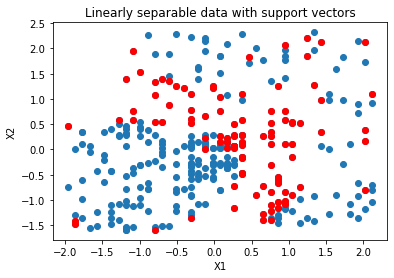

In [35]:
# Get support vectors themselves
support_vectors = svc_model.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,1], X_train[:,2])
plt.scatter(support_vectors[:,1], support_vectors[:,2], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

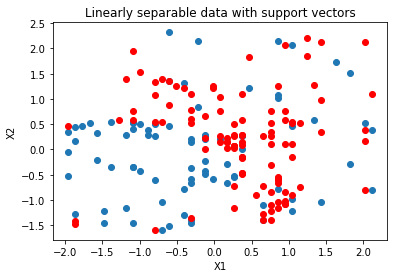

In [38]:
# Get support vectors themselves
support_vectors = svc_model.support_vectors_

# Visualize support vectors
plt.scatter(X_test[:,1], X_test[:,2])
plt.scatter(support_vectors[:,1], support_vectors[:,2], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()